In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Load ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [5]:
# Create a new model
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('resnet_cifar10_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [8]:
history = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_split=0.1, callbacks=[early_stopping, model_checkpoint])


Epoch 1/25
704/704 [==============================] - ETA: 0s - loss: 1.2987 - accuracy: 0.5630
Epoch 1: val_accuracy improved from -inf to 0.11820, saving model to resnet_cifar10_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


704/704 [==============================] - 75s 58ms/step - loss: 1.2987 - accuracy: 0.5630 - val_loss: 4.7126 - val_accuracy: 0.1182
Epoch 2/25
703/704 [============================>.] - ETA: 0s - loss: 0.6939 - accuracy: 0.7630
Epoch 2: val_accuracy improved from 0.11820 to 0.75740, saving model to resnet_cifar10_model.h5
704/704 [==============================] - 37s 52ms/step - loss: 0.6940 - accuracy: 0.7630 - val_loss: 0.7098 - val_accuracy: 0.7574
Epoch 3/25
703/704 [============================>.] - ETA: 0s - loss: 0.4713 - accuracy: 0.8380
Epoch 3: val_accuracy improved from 0.75740 to 0.77220, saving model to resnet_cifar10_model.h5
704/704 [==============================] - 36s 51ms/step - loss: 0.4715 - accuracy: 0.8380 - val_loss: 0.7039 - val_accuracy: 0.7722
Epoch 4/25
704/704 [==============================] - ETA: 0s - loss: 0.3378 - accuracy: 0.8853
Epoch 4: val_accuracy improved from 0.77220 to 0.78660, saving model to resnet_cifar10_model.h5
704/704 [================

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 78.95%


In [10]:
import matplotlib.pyplot as plt

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

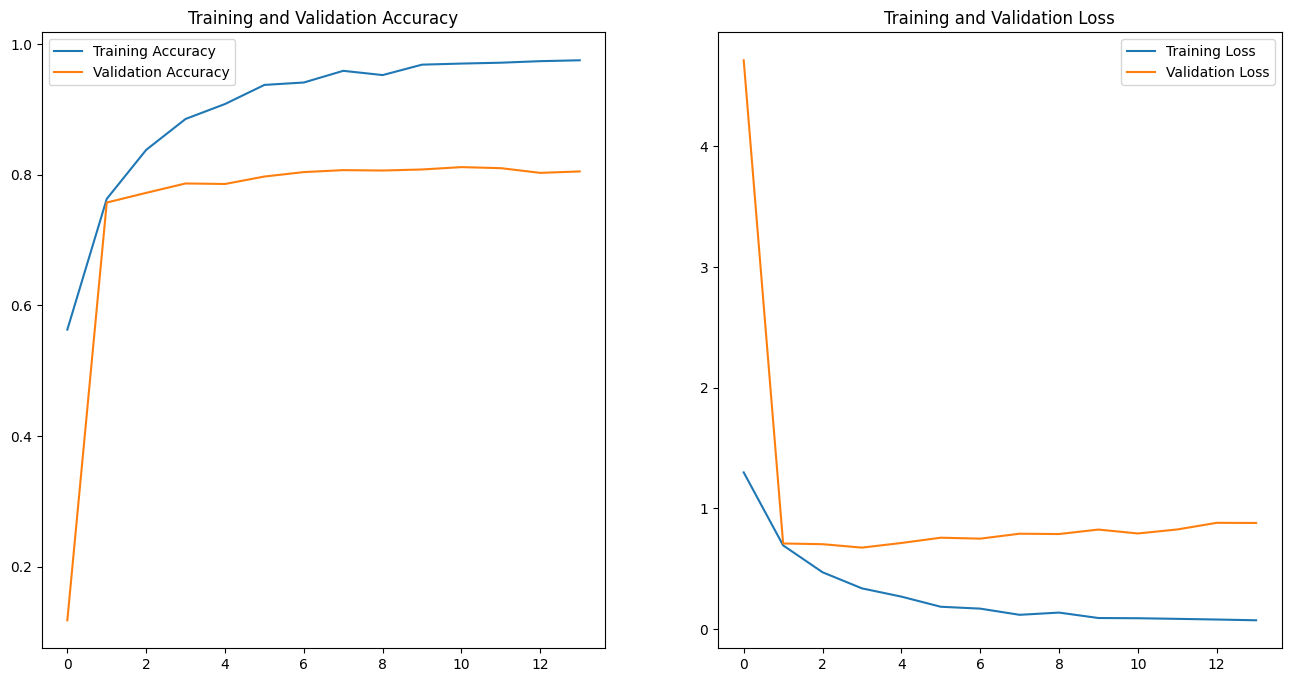

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(14), acc, label='Training Accuracy')
plt.plot(range(14), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(14), loss, label='Training Loss')
plt.plot(range(14), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# Save the model
model.save('resnet_cifar10_model_final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
